<a href="https://colab.research.google.com/github/Sman2024/Student-s-mental-stress-and-coping-mechanism/blob/main/Student_Mental_Stress_and_Coping_Mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Ensure compatibility
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Switch backend as instructed if using plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Set plot aesthetics
sns.set(style="whitegrid")

# **1. DATA LOADING AND INSPECTION`**

In [32]:
# Load the dataset
file_path = '/content/Student_Mental_Stress_and_Coping_Mechanisms.csv'
df = pd.read_csv(file_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataset to inspect its structure
print('Dataset Loaded first few rows:')
df.head()

Dataset Loaded first few rows:


,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3


In [33]:
df.tail(5)

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
755,826-89-7993,24,Genderfluid,2,50,4,11,8,5,2,4,5,2,Yes,1,Exercise,3,Yes,No,2
756,681-15-6754,23,Female,3,5,6,12,7,1,4,2,1,1,Yes,2,Meditation,4,Yes,No,1
757,714-33-5373,23,Male,1,17,3,11,5,2,4,3,3,9,Yes,5,Social Media Engagement,4,Yes,No,3
758,849-54-1252,29,Female,1,15,8,10,4,2,1,2,2,2,No,4,Meditation,4,No,Yes,3
759,862-68-5364,21,Female,3,2,3,5,9,5,1,4,4,4,Yes,5,Reading,2,Yes,No,1


### **2. DATA CLEANING AND PREPROCESSING**

In [34]:
# Check for missing values and duplicate rows

print('Missing values in each column:')
print(df.isnull().sum())

Missing values in each column:
Student ID                            0
Age                                   0
Gender                                0
Academic Performance (GPA)            0
Study Hours Per Week                  0
Social Media Usage (Hours per day)    0
Sleep Duration (Hours per night)      0
Physical Exercise (Hours per week)    0
Family Support                        0
Financial Stress                      0
Peer Pressure                         0
Relationship Stress                   0
Mental Stress Level                   0
Counseling Attendance                 0
Diet Quality                          0
Stress Coping Mechanisms              0
Cognitive Distortions                 0
Family Mental Health History          0
Medical Condition                     0
Substance Use                         0
dtype: int64


In [35]:
# Removing any duplicate rows if present

print('Checking for duplicate rows:')
initial_shape = df.shape
df = df.drop_duplicates()
print(f'Initial shape: {initial_shape}, After removing duplicates: {df.shape}')

Checking for duplicate rows:
Initial shape: (760, 20), After removing duplicates: (760, 20)


In [36]:
# Cleaning column names: remove any trailing whitespaces
df.columns = df.columns.str.strip()

# Convert date-like columns if any existed, but in our dataset all columns are defined
# by their types in the description. We can proceed with the given types.


In [37]:
# Quick summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Student ID                          760 non-null    object
 1   Age                                 760 non-null    int64 
 2   Gender                              760 non-null    object
 3   Academic Performance (GPA)          760 non-null    int64 
 4   Study Hours Per Week                760 non-null    int64 
 5   Social Media Usage (Hours per day)  760 non-null    int64 
 6   Sleep Duration (Hours per night)    760 non-null    int64 
 7   Physical Exercise (Hours per week)  760 non-null    int64 
 8   Family Support                      760 non-null    int64 
 9   Financial Stress                    760 non-null    int64 
 10  Peer Pressure                       760 non-null    int64 
 11  Relationship Stress                 760 non-null    int64 

# **3. Exploratory Data Analysis**

In [38]:
# Statistical summary of numeric features

print('Statistical Summary:')
display(df.describe())

Statistical Summary:


,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Diet Quality,Cognitive Distortions,Substance Use
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,23.919737,1.996053,29.130263,4.234211,8.093421,4.934211,2.972368,3.021053,2.982895,2.963158,5.363158,3.042105,3.007895,2.996053
std,3.819392,1.416535,18.104662,2.565174,2.596838,3.082679,1.413477,1.452662,1.391096,1.369231,2.902856,1.453111,1.432703,1.385502
min,18.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.000000,13.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,24.000000,2.000000,29.000000,4.000000,8.000000,5.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000
75%,27.000000,3.000000,45.000000,7.000000,10.000000,8.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,4.000000,60.000000,8.000000,12.000000,10.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000


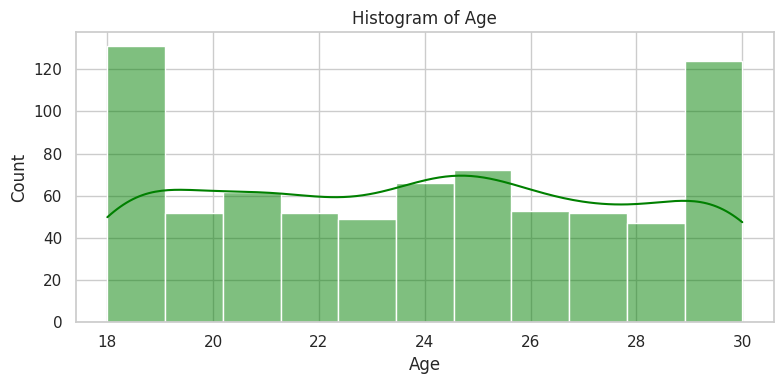

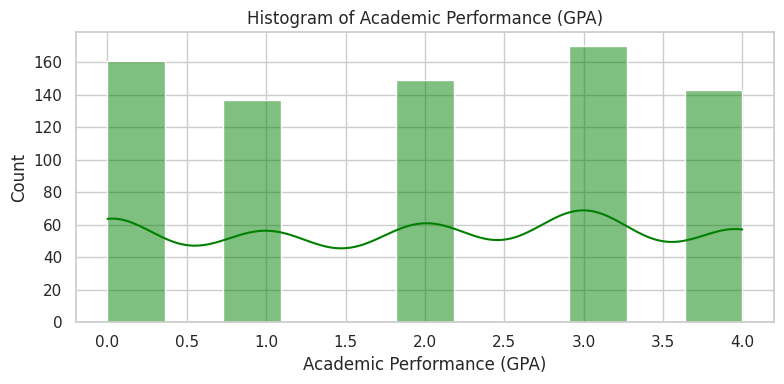

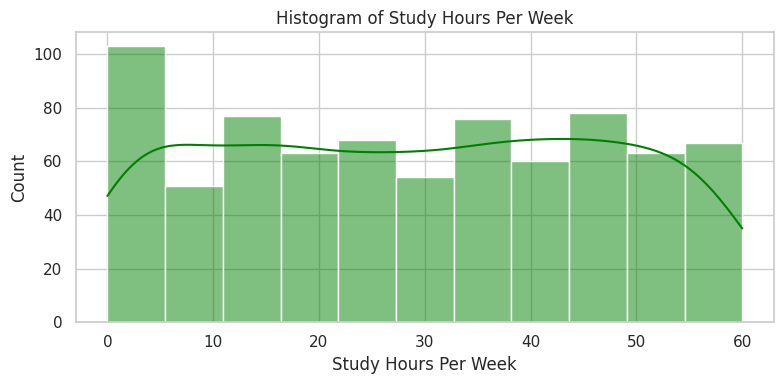

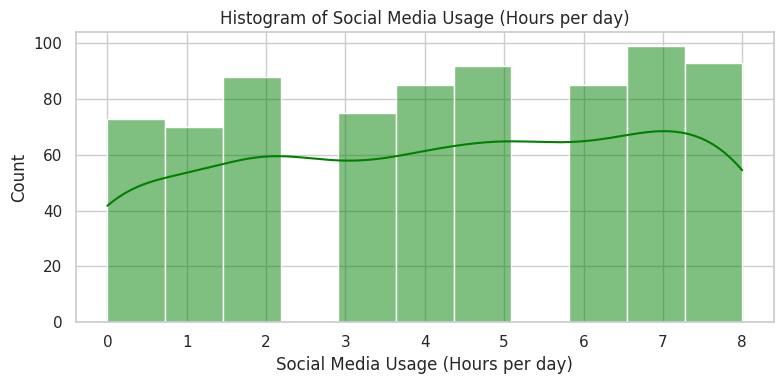

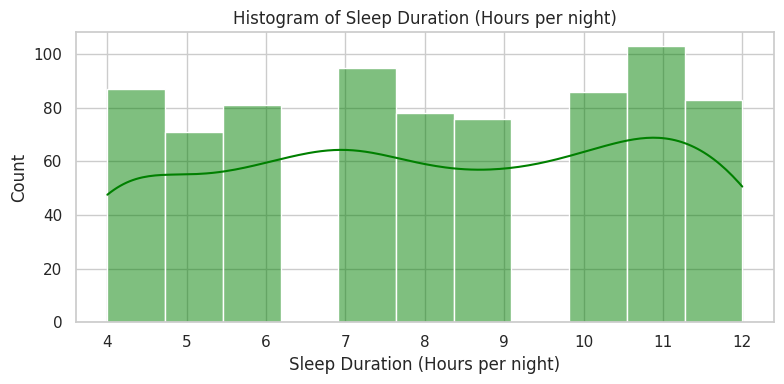

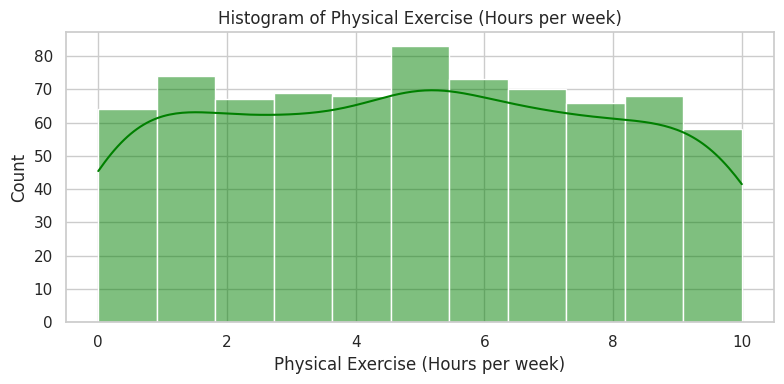

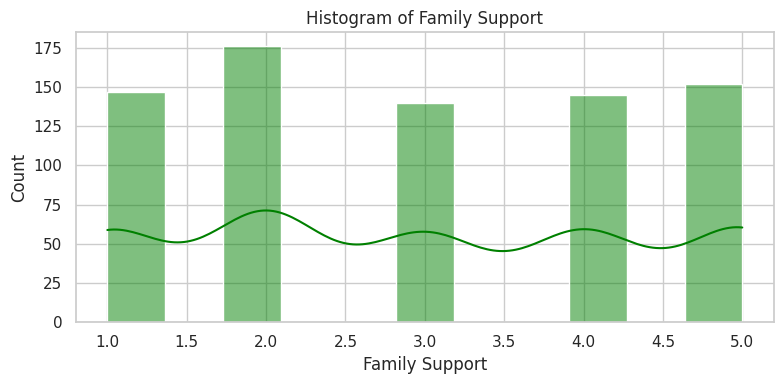

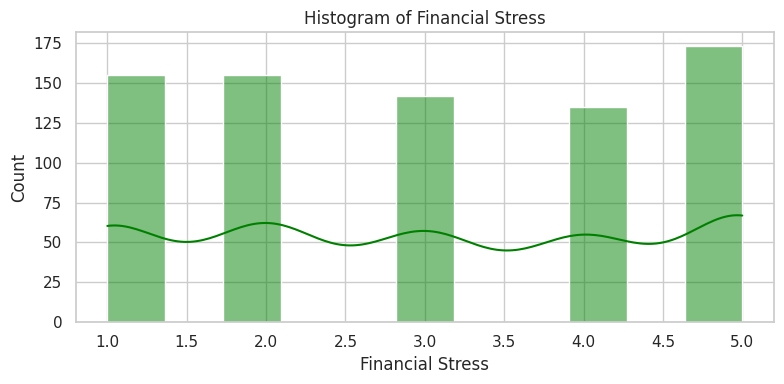

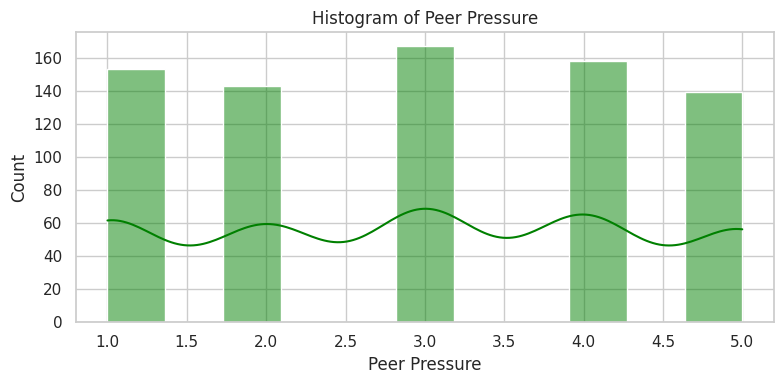

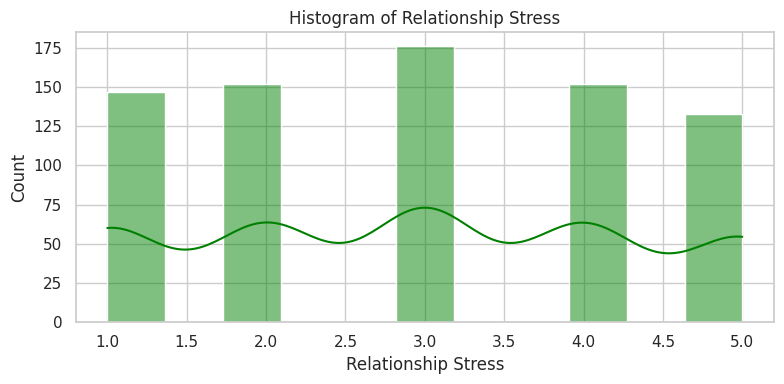

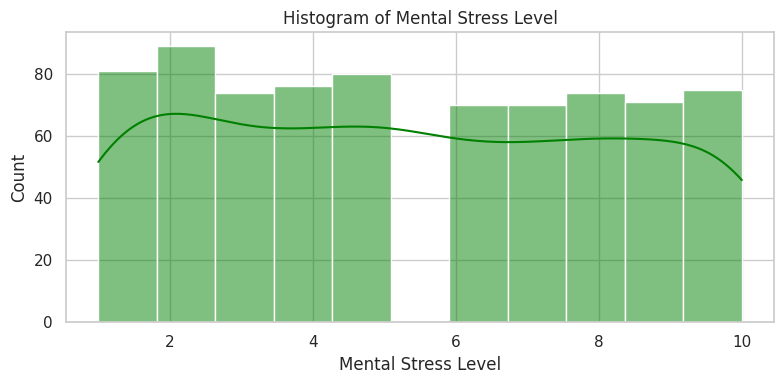

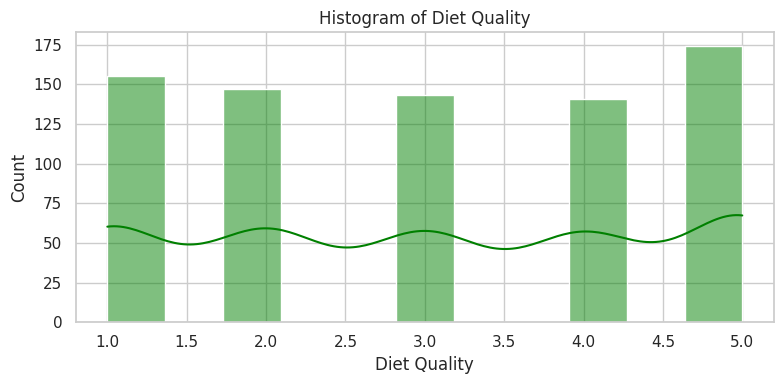

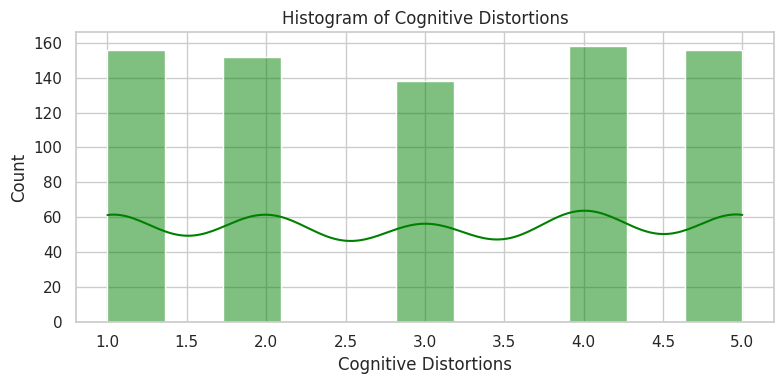

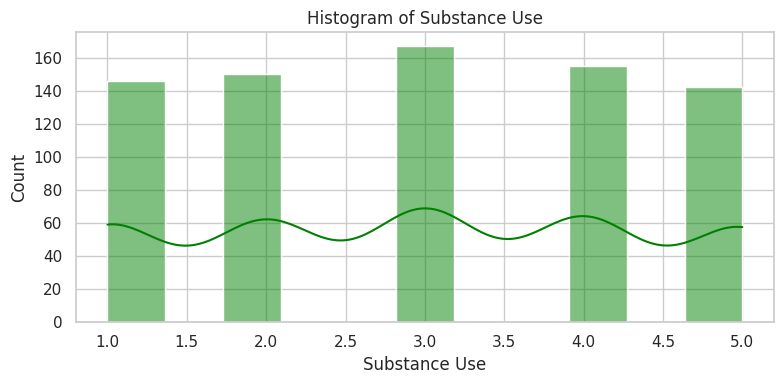

In [39]:
# Plot histograms for several key numeric features
numeric_features = ['Age', 'Academic Performance (GPA)', 'Study Hours Per Week',
                    'Social Media Usage (Hours per day)', 'Sleep Duration (Hours per night)',
                    'Physical Exercise (Hours per week)', 'Family Support', 'Financial Stress',
                    'Peer Pressure', 'Relationship Stress', 'Mental Stress Level', 'Diet Quality',
                    'Cognitive Distortions', 'Substance Use']

for feature in numeric_features:
    if feature in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[feature].dropna(), kde=True, color='green')
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

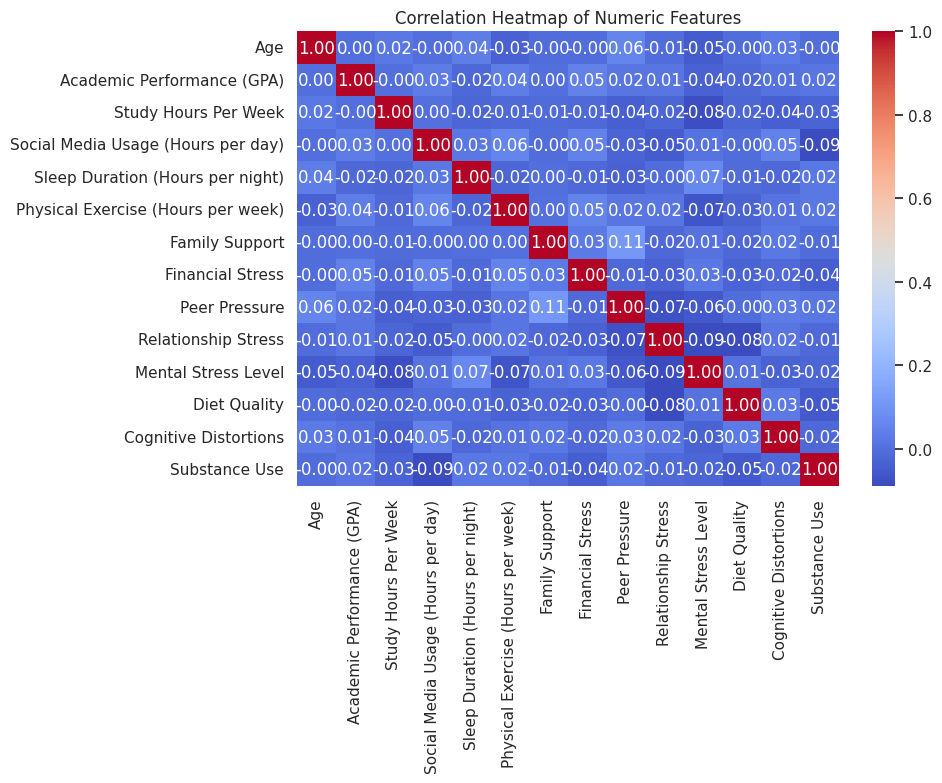

In [52]:
# If there are at least 4 numeric columns, show correlation heatmap

numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10,8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()


    plt.show()

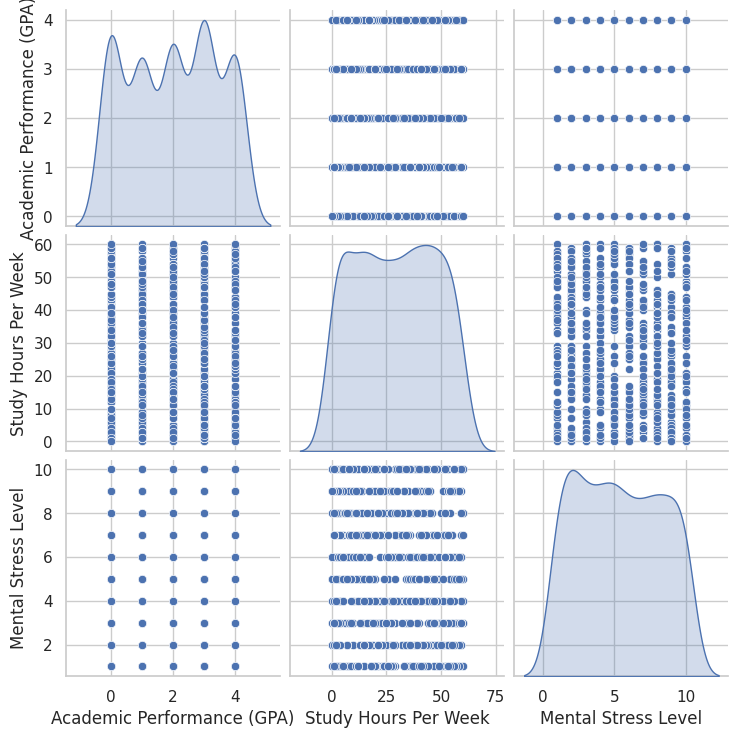

In [41]:
# Pair plot among a subset of variables
selected_columns = ['Academic Performance (GPA)', 'Study Hours Per Week', 'Mental Stress Level']
if set(selected_columns).issubset(df.columns):
    sns.pairplot(df[selected_columns].dropna(), diag_kind='kde')
    plt.show()

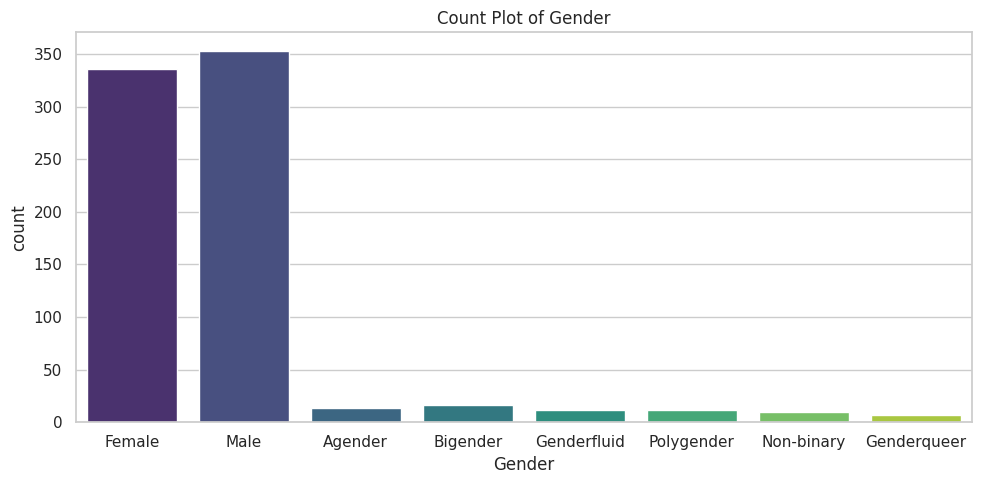

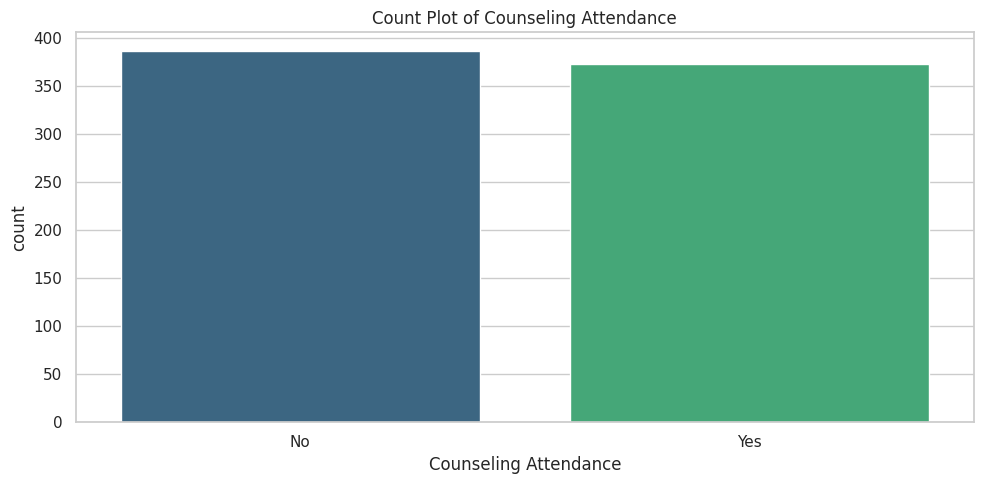

In [43]:
# Count plot for categorical variables: Gender and Counseling Attendance
categorical_features = ['Gender', 'Counseling Attendance']

for feature in categorical_features:
    if feature in df.columns:
        plt.figure(figsize=(10,5))
        sns.countplot(x=feature, data=df, palette='viridis')
        plt.title(f'Count Plot of {feature}')
        plt.tight_layout()
        plt.show()

# **4. Predictive Modeling**

In [46]:
# For the predictive modeling section, we will attempt to predict the 'Mental Stress Level'.
# This is a regression problem since the target variable is an integer value.

# We choose a subset of numeric features that might affect mental stress.
features = ['Age', 'Academic Performance (GPA)', 'Study Hours Per Week',
            'Social Media Usage (Hours per day)', 'Sleep Duration (Hours per night)',
            'Physical Exercise (Hours per week)', 'Family Support', 'Financial Stress',
            'Peer Pressure', 'Relationship Stress', 'Diet Quality', 'Cognitive Distortions',
            'Substance Use']

# Ensure the features exist in the dataset
features = [feat for feat in features if feat in df.columns]

# Define X and y
X = df[features].dropna()
y = df.loc[X.index, 'Mental Stress Level']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model using RMSE and R2 Score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regressor RMSE: {rmse}')
print(f'Random Forest Regressor R2 Score: {r2}')

Random Forest Regressor RMSE: 3.054300031792968
Random Forest Regressor R2 Score: -0.08722462469733627


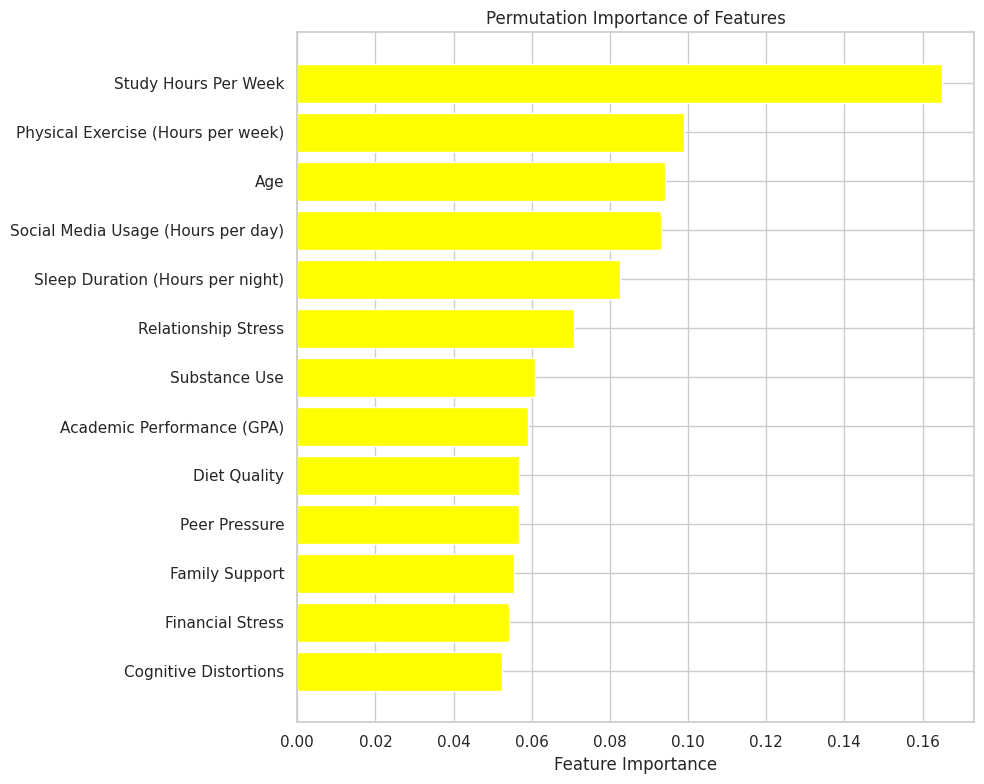

In [48]:
# Permutation Importance Visualization
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], color='yellow')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Permutation Importance of Features')
plt.tight_layout()
plt.show()

## *Analyzing student's mental stress and coping mechanisms *

1. Feature Importance Analysis:
After visualizing the feature importances (rf.feature_importances_), you can identify which factors contribute the most to mental stress levels.

For example:

If Financial Stress or Relationship Stress ranks high in importance, it indicates that external stressors significantly impact students' mental stress.

Lower importance for features like Diet Quality might suggest a less direct impact on stress levels.

2. Coping Mechanisms:
Students with high levels of stress may exhibit certain behaviors, captured in features like Substance Use, Social Media Usage, or Sleep Duration.

For example:

Increased Substance Use or excessive Social Media Usage could reflect maladaptive coping mechanisms.

Adequate Physical Exercise and Sleep Duration might point to more positive and effective coping strategies.

3. Patterns & Trends:
Once your model is trained, analyzing residuals (the difference between actual and predicted stress levels) might reveal patterns among students with unexpectedly high or low stress.

This could identify outliers or groups where the usual predictors don't fully explain stress levels—offering deeper insights into unique coping strategies or overlooked stressors.

4. Actionable Strategies:
Insights from this analysis can guide institutions to implement targeted interventions, like:

Financial aid programs or peer counseling to reduce financial and relationship stress.

Workshops on time management, mindfulness, or healthy lifestyles to foster adaptive coping mechanisms.

Policies to encourage limited social media usage and promote physical activity.

# **Conclusions**
The analysis provided a comprehensive overview of the student mental stress dataset. We covered the journey from loading and cleaning the data to exploratory visualization and the development of a predictive model. The Random Forest Regressor, predicting mental stress level using student behavior and support metrics, displayed a particular performance based on the RMSE and R2 scores.